# Projeto: Séries temporais - MBA

Observações:

1. Para cada questão, crie novas células para efetuar seus códigos. 

2. Nomear variáveis de acordo com o contexto da questão. 

3. Caso necessário, utilize novas caixas de textos para deixar comentários. 

Prof. Jorge Luiz 

jorgearaujo@unifor.br

Você recebeu um dado chamado 'Electric_Production.csv'. Atribua-o a um dataframe df.

In [1]:
import pandas as pd

df=pd.read_csv('Electric_Production.csv')

df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


## 1. A partir de df, use os modelos abaixo para fazer previsões para os 30 períodos futuros.

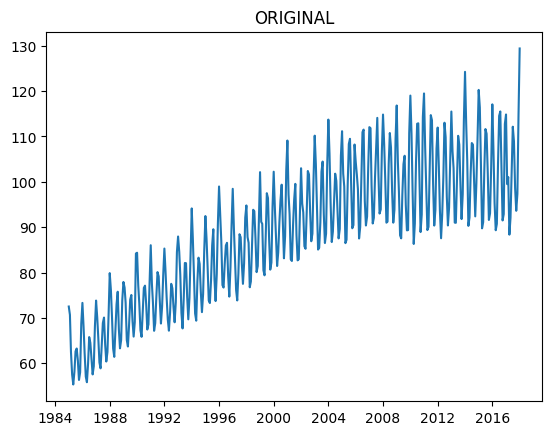

In [2]:
import matplotlib.pyplot as plt

ser=pd.Series(df['IPG2211A2N'].values,index=pd.to_datetime(df['DATE']))

plt.title('ORIGINAL')
plt.plot(ser)

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


def treinaARIMA(serie, ordem):
    modelo_ar = sm.tsa.arima.ARIMA(serie.values, order=ordem)
    resultado = modelo_ar.fit()
    print('AIC:', resultado.aic)
    return resultado


def getProximaData(serie):
    return serie.index[-1]+pd.DateOffset(months=1)


def previsaoARIMA(modelo, serie, periodos):
    previsao = modelo.predict(start=len(serie), end=len(serie)+periodos-1)
    proximaData = getProximaData(serie)
    datas = pd.date_range(start=proximaData, periods=periodos, freq='ME')
    return pd.Series(previsao, index=datas)


def plotPrevisao(serie, previsao, title='PREVISAO', lableSerie='Original', labelPrevisao='Previsao'):
    plt.title(title)
    plt.plot(serie, label=lableSerie)
    plt.plot(previsao, label=labelPrevisao, linestyle='--')
    plt.legend()
    plt.show()

#### a. ARIMA (2,0,0)

AIC: 2641.8033103564458


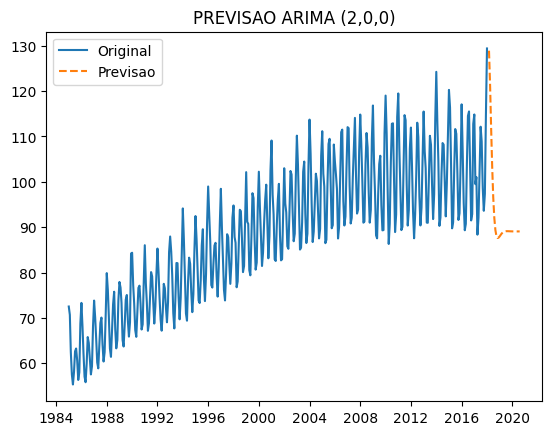

In [4]:
import statsmodels.api as sm

modelo200=treinaARIMA(ser,(2,0,0))
previsao200=previsaoARIMA(modelo200,ser,30)
plotPrevisao(ser,previsao200, title='PREVISAO ARIMA (2,0,0)')

#### b. ARIMA (2,0,1)

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AIC: 2582.998069572891


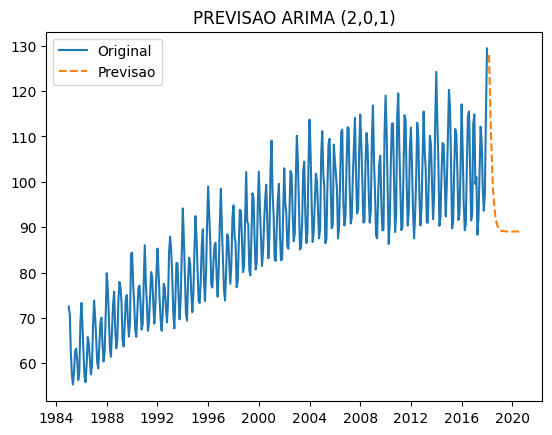

In [5]:
modelo201=treinaARIMA(ser,(2,0,1))
previsao201=previsaoARIMA(modelo201,ser,30)
plotPrevisao(ser,previsao201, title='PREVISAO ARIMA (2,0,1)')

#### c. ARIMA (2,2,1)

AIC: 2464.3044603158087


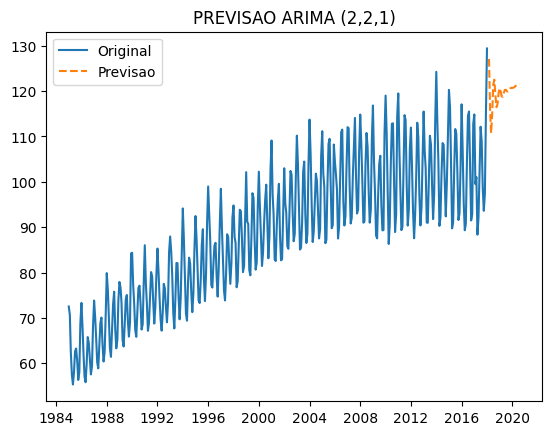

In [6]:
modelo221=treinaARIMA(ser,(2,2,1))
previsao221=previsaoARIMA(modelo221,ser,30)
plotPrevisao(ser,previsao221, title='PREVISAO ARIMA (2,2,1)')

#### d. ARIMA (8,2,1)

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC: 2199.136104749496


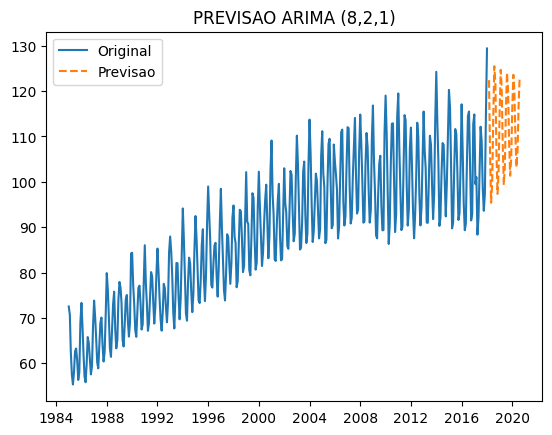

In [7]:
modelo821=treinaARIMA(ser,(8,2,1))
previsao821=previsaoARIMA(modelo821,ser,30)
plotPrevisao(ser,previsao821, title='PREVISAO ARIMA (8,2,1)')

#### e. Criei um gráfico com todas as previsões acima.

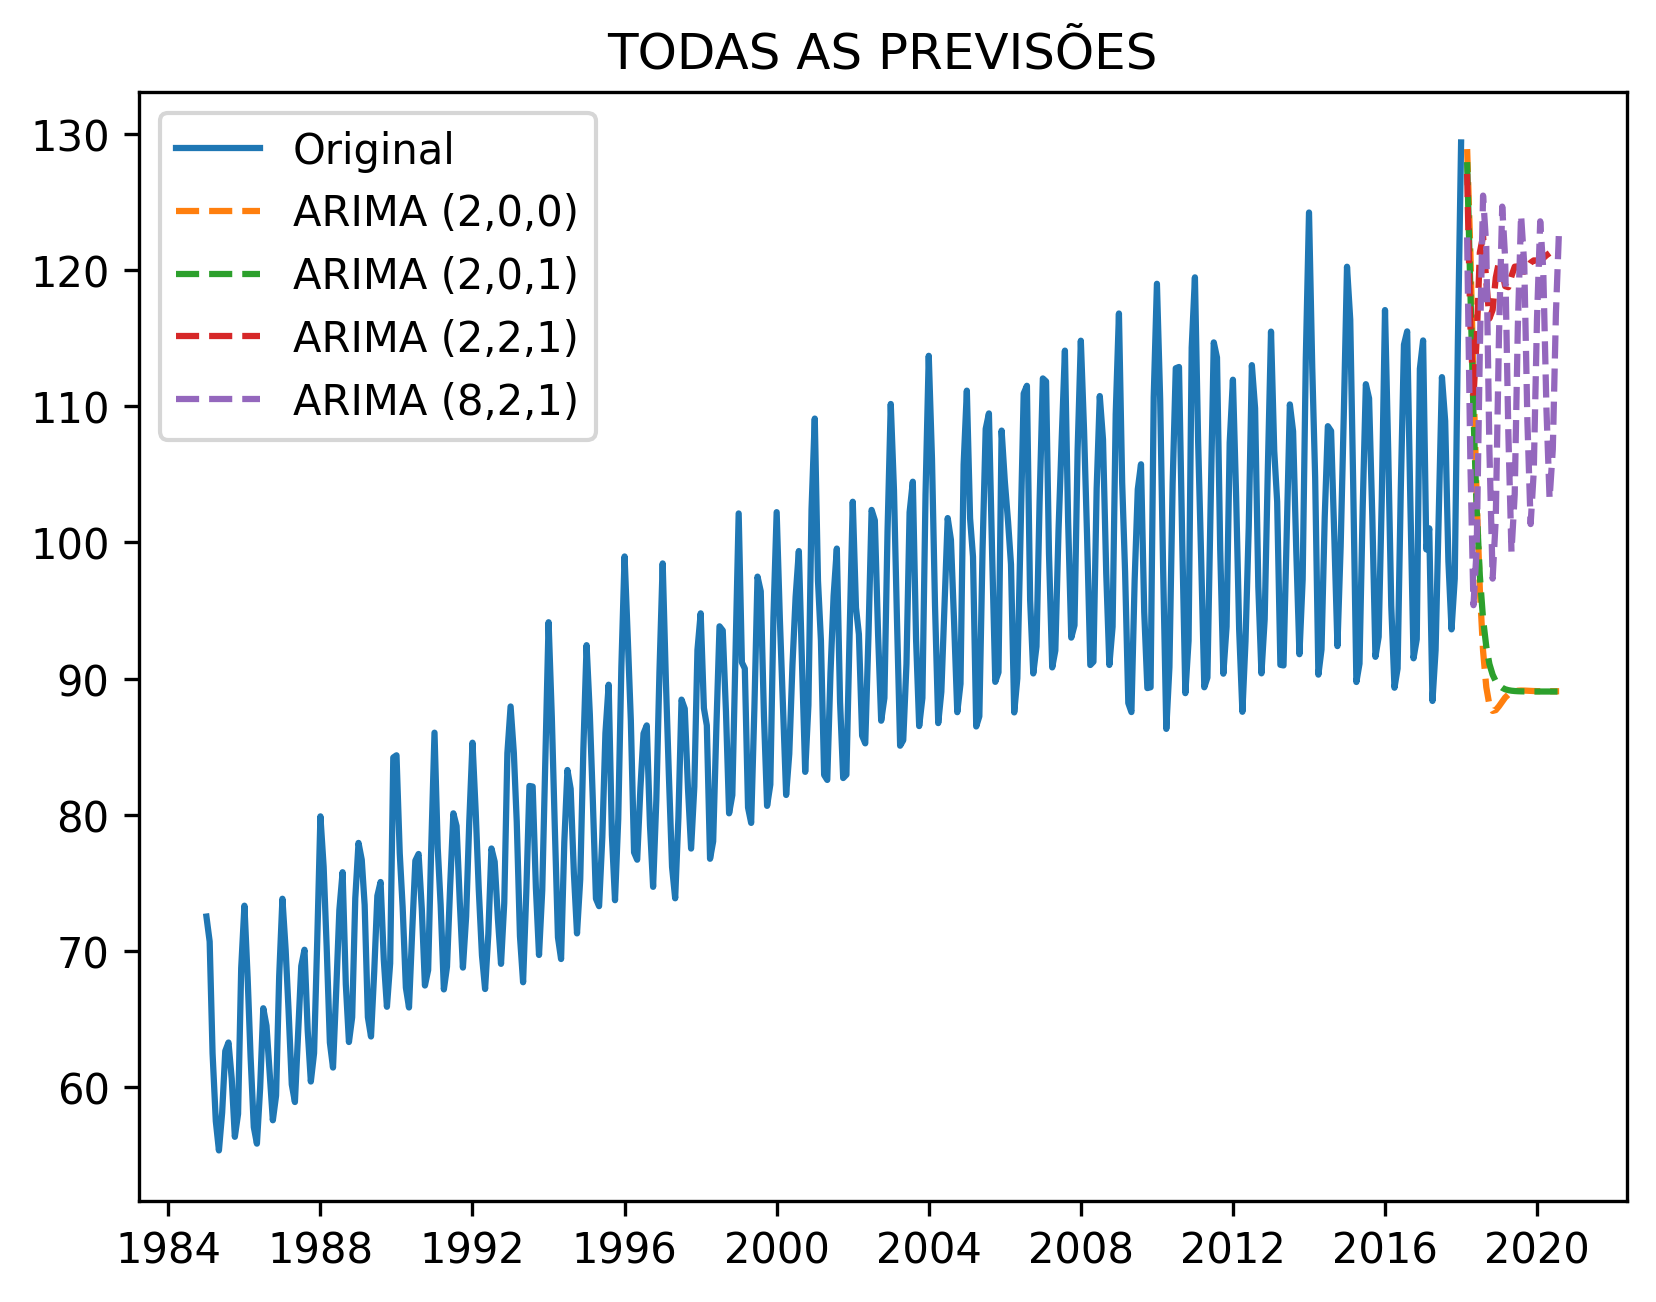

In [8]:
plt.figure(dpi=300)
plt.title("TODAS AS PREVISÕES")
plt.plot(ser, label='Original')
plt.plot(previsao200, label='ARIMA (2,0,0)', linestyle='--')
plt.plot(previsao201, label='ARIMA (2,0,1)', linestyle='--')
plt.plot(previsao221, label='ARIMA (2,2,1)', linestyle='--')
plt.plot(previsao821, label='ARIMA (8,2,1)', linestyle='--')
plt.legend()

plt.show()

#### f. Entre estes, qual é o melhor? Utilize a métrica AIC.

In [9]:
labels = ['ARIMA (2,0,0)', 'ARIMA (2,0,1)', 'ARIMA (2,2,1)', 'ARIMA (8,2,1)']
valores = [modelo200.aic, modelo201.aic, modelo221.aic, modelo821.aic]
lista = list(zip(labels, valores))

lista.sort(key=lambda x: x[1])

print('Ranking dos modelos ARIMA:\n')

for i, (label, valor) in enumerate(lista):
    print(f'{i+1}º lugar:', label, 'AIC:', valor)


print('\nVENCEDOR:', lista[0][0],  'AIC:', lista[0][1])

Ranking dos modelos ARIMA:

1º lugar: ARIMA (8,2,1) AIC: 2199.136104749496
2º lugar: ARIMA (2,2,1) AIC: 2464.3044603158087
3º lugar: ARIMA (2,0,1) AIC: 2582.998069572891
4º lugar: ARIMA (2,0,0) AIC: 2641.8033103564458

VENCEDOR: ARIMA (8,2,1) AIC: 2199.136104749496


#### g. Use o auto-arima e apresente o melhor modelo encontrado. 

In [10]:
# Use o auto-arima e apresente o melhor modelo encontrado.
from pmdarima import auto_arima

modelo = auto_arima(ser, trace=True, stepwise=True, seasonal=False,
                         max_p=12, max_q=2, max_P=12, max_Q=1, star_p=0,
                         star_P=0, star_Q=0, m=12)

modelo_auto = modelo.fit(ser)

Performing stepwise search to minimize aic


/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2235.015, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2463.436, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2219.925, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2300.788, Time=0.04 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2214.195, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2214.112, Time=0.07 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2213.445, Time=0.14 sec
 ARIMA(6,1,0)(0

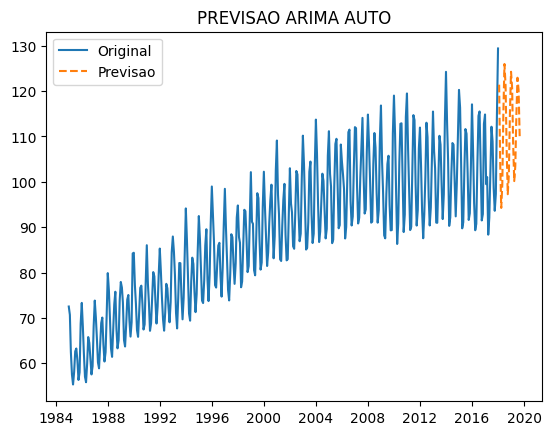

In [11]:
previsao_auto=modelo_auto.predict(n_periods=20)
plotPrevisao(ser,previsao_auto, title='PREVISAO ARIMA AUTO')


#### h. Compare os modelos ARIMA com qualquer implementação de um modelo ML. 

In [12]:
ser

DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Length: 397, dtype: float64

In [44]:
# X_train.values.reshape(-1, 1)

# a variável X_train é um array de datas no formato datetime64[ns]
# converta em um DataFrame com uma coluna chamada 'ANO' e outra chamada 'MES' extraindo essas informações da data.
df_train=pd.DataFrame(X_train.values,columns=['DATA'])
df_train['ANO']=df_train['DATA'].dt.year
df_train['MES']=df_train['DATA'].dt.month
df_train

# X_train.values

,DATA,ANO,MES
0,1985-01-01,1985,1
1,1985-02-01,1985,2
2,1985-03-01,1985,3
3,1985-04-01,1985,4
4,1985-05-01,1985,5
...,...,...,...
312,2011-01-01,2011,1
313,2011-02-01,2011,2
314,2011-03-01,2011,3
315,2011-04-01,2011,4


### Separando os dados de treino e test

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = ser.index
y = ser.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

df_train=pd.DataFrame(X_train.values,columns=['DATA'])
df_train['ANO']=df_train['DATA'].dt.year
df_train['MES']=df_train['DATA'].dt.month

df_test=pd.DataFrame(X_test.values,columns=['DATA'])
df_test['ANO']=df_test['DATA'].dt.year
df_test['MES']=df_test['DATA'].dt.month

serie_train = pd.Series(y_train, index=X_train)

### Treinando modelos

In [50]:
# para treinar o random forest use o ano e o mês
modelo_rf = RandomForestRegressor().fit(df_train[['ANO', 'MES']], y_train)
# modelo_rf = RandomForestRegressor().fit(X_train.values.reshape(-1, 1), y_train)
modelo200 = sm.tsa.arima.ARIMA(y_train, order=(2, 0, 0)).fit()
modelo201 = sm.tsa.arima.ARIMA(y_train, order=(2, 0, 1)).fit()
modelo221 = sm.tsa.arima.ARIMA(y_train, order=(2, 2, 1)).fit()
modelo821 = sm.tsa.arima.ARIMA(y_train, order=(8, 2, 1)).fit()
modelo_auto = auto_arima(ser, trace=False, stepwise=True, seasonal=False,
                         max_p=12, max_q=2, max_P=12, max_Q=1, star_p=0,
                         star_P=0, star_Q=0, m=12).fit(serie_train)

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Previsão de Series Temporais/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/clairtonluz/projects/personal/MBA-em-

### Previsão dos modelos

In [52]:
previsao_rf = modelo_rf.predict(df_test[['ANO', 'MES']])
previsao_rf = pd.Series(previsao_rf, index=ser.index[-len(y_test):])

start_len = len(y_train)
end_len = len(y_train)+len(y_test)-1

previsao200 = modelo200.predict(start=start_len, end=end_len)
previsao200 = pd.Series(previsao200, index=ser.index[-len(y_test):])

previsao201 = modelo201.predict(start=start_len, end=end_len)
previsao201 = pd.Series(previsao201, index=ser.index[-len(y_test):])

previsao221 = modelo221.predict(start=start_len, end=end_len)
previsao221 = pd.Series(previsao221, index=ser.index[-len(y_test):])

previsao821 = modelo821.predict(start=start_len, end=end_len)
previsao821 = pd.Series(previsao821, index=ser.index[-len(y_test):])

previsao_auto = modelo_auto.predict(n_periods=end_len-start_len+1)

### Calculando MSE dos modelos

In [54]:
mse200 = mean_squared_error(y_test, previsao200)
mse201 = mean_squared_error(y_test, previsao201)
mse221 = mean_squared_error(y_test, previsao221)
mse821 = mean_squared_error(y_test, previsao821)
mse_auto = mean_squared_error(y_test, previsao_auto)
mse_rf = mean_squared_error(y_test, previsao_rf)

allMse = [
    ('ARIMA (2,0,0)', mse200),
    ('ARIMA (2,0,1)', mse201),
    ('ARIMA (2,2,1)', mse221),
    ('ARIMA (8,2,1)', mse821),
    ('ARIMA AUTO', mse_auto),
    ('RANDOM FOREST', mse_rf)
]

allMse.sort(key=lambda x: x[1])

print('\nRanking dos modelos:\n')

for i, (label, valor) in enumerate(allMse):
    print(f'{i+1}º lugar:', label, 'MSE:', valor)

print('\nVENCEDOR:', allMse[0][0],  'MSE:', allMse[0][1])


Ranking dos modelos:

1º lugar: RANDOM FOREST MSE: 13.314608618144291
2º lugar: ARIMA (8,2,1) MSE: 58.697033614910296
3º lugar: ARIMA AUTO MSE: 67.26066860904271
4º lugar: ARIMA (2,2,1) MSE: 96.76125146374599
5º lugar: ARIMA (2,0,1) MSE: 381.5486620990192
6º lugar: ARIMA (2,0,0) MSE: 387.67232811530687

VENCEDOR: RANDOM FOREST MSE: 13.314608618144291


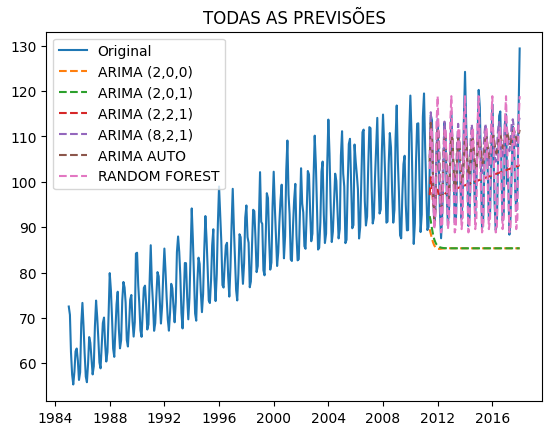

In [67]:
# plot um gráfico com a série original e a previsão de todos os modelos

plt.title("TODAS AS PREVISÕES")
plt.plot(ser, label='Original')
plt.plot(previsao200, label='ARIMA (2,0,0)', linestyle='--')
plt.plot(previsao201, label='ARIMA (2,0,1)', linestyle='--')
plt.plot(previsao221, label='ARIMA (2,2,1)', linestyle='--')
plt.plot(previsao821, label='ARIMA (8,2,1)', linestyle='--')
plt.plot(previsao_auto, label='ARIMA AUTO', linestyle='--')
plt.plot(previsao_rf, label='RANDOM FOREST', linestyle='--')
plt.legend()

plt.show()


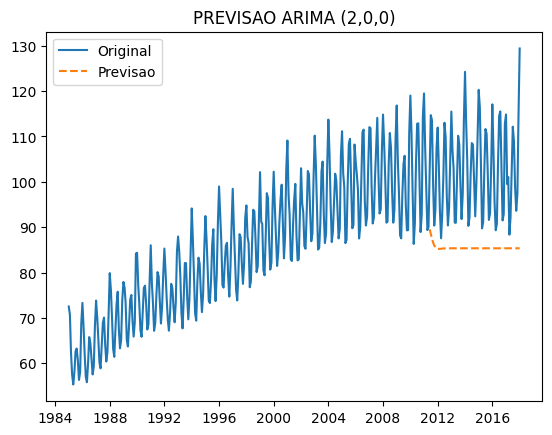

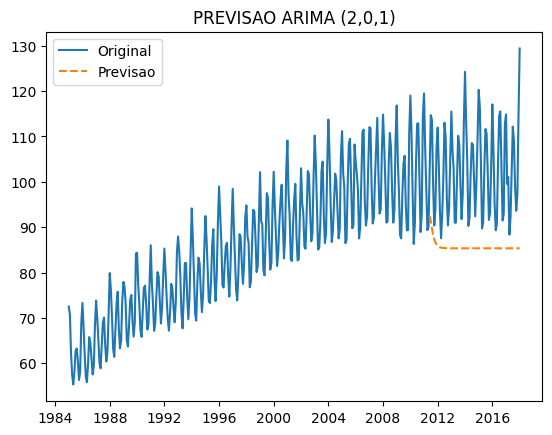

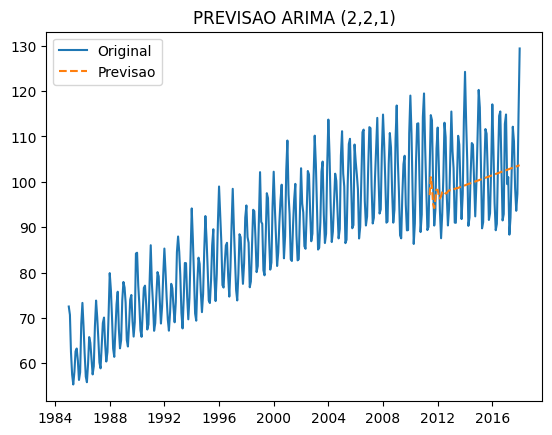

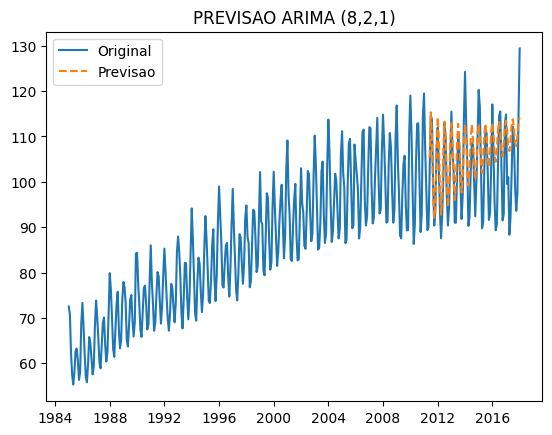

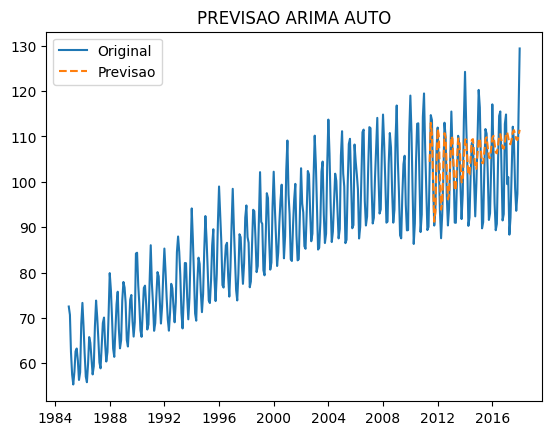

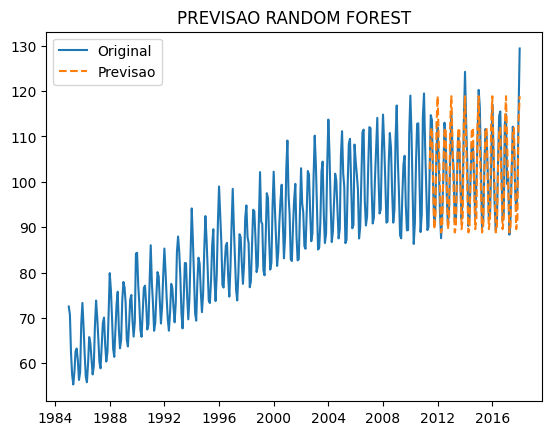

In [65]:
# imprima cada uma das previsões e a série original em um gráfico separado
plotPrevisao(ser, previsao200, title='PREVISAO ARIMA (2,0,0)')
plotPrevisao(ser, previsao201, title='PREVISAO ARIMA (2,0,1)')
plotPrevisao(ser, previsao221, title='PREVISAO ARIMA (2,2,1)')
plotPrevisao(ser, previsao821, title='PREVISAO ARIMA (8,2,1)')
plotPrevisao(ser, previsao_auto, title='PREVISAO ARIMA AUTO')
plotPrevisao(ser, previsao_rf, title='PREVISAO RANDOM FOREST')
